In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

In [2]:
stars = pd.read_csv("stars.csv")
dwarfs = stars[(stars["Star type"]==1) | (stars["Star type"]==2) ]
dwarfs.head()

,Temperature(K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
10,3600,0.0029,0.5100,10.690,1,Red,M
11,3129,0.0122,0.3761,11.790,1,Red,M
12,3134,0.0004,0.1960,13.210,1,Red,M
13,3628,0.0055,0.3930,10.480,1,Red,M
14,2650,0.0006,0.1400,11.782,1,Red,M


In [3]:
X = dwarfs[["Temperature(K)","Radius(R/Ro)"]].values
y = dwarfs[["Star type"]].values
yl = LabelEncoder().fit_transform(y.flatten())

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,yl, test_size=0.2, random_state=42)
# y_test

(0, 25000)

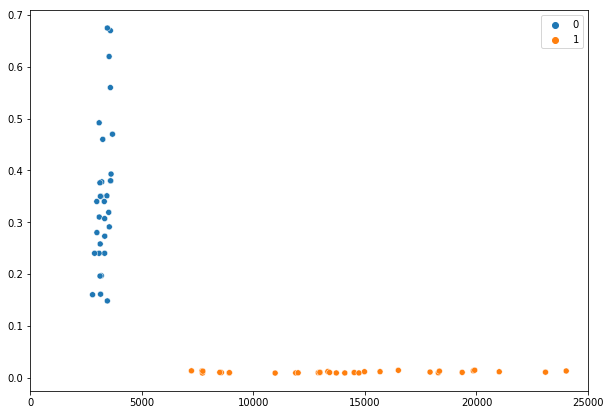

In [5]:
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train)
plt.xlim(0,25000)

In [6]:
# define the model
model = Sequential()
model.add(Dense(1, activation='leaky_relu', kernel_initializer='he_normal', input_shape=(2,)))
#model.add(Dense(4, activation='leaky_relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, epochs=1000, batch_size=30, verbose=0)

In [9]:
loss,acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 129ms/step - loss: 0.2272 - accuracy: 1.0000


(-1, 1)

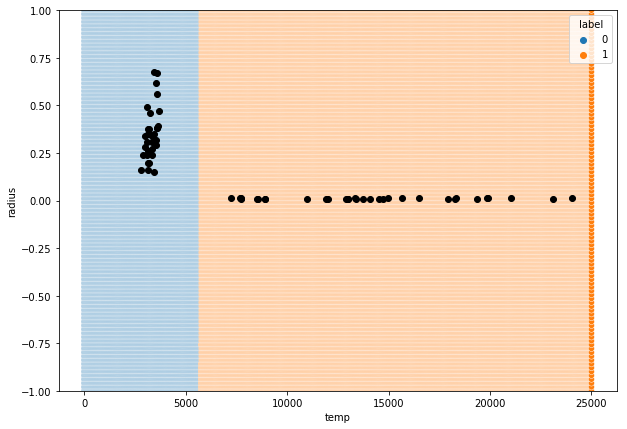

In [10]:
# Plot the decision boundary
temp = np.linspace(0,25000,1000)
radius = np.linspace(-1,1,100)
from itertools import product
randomdata = np.array(list(product(temp,radius)))
g = model.predict(randomdata)
db=pd.DataFrame({"temp":randomdata[:,0],"radius":randomdata[:,1],"label":list(map(np.argmax,g)) })
X_train,X_test,y_train,y_test = train_test_split(X,yl, test_size=0.2,random_state=42)
sns.scatterplot(data=db,x="temp",y="radius",hue="label")
plt.scatter(X_train[:,0],X_train[:,1],color="black")
#plt.xlim(0,5000)
plt.ylim(-1,1)